# Linear regression
Problem:  
Given dataset (observations) $(x_i, y_i)_{i=1}^{M}$  
We assume that $ (x, y) $ pairs were genearted with $ y = a * x + b + \epsilon $  
$ \epsilon $ - Gaussian noise

Find approximation $ \hat{y}=a*x+b $ that minimizes mean square error $L = \frac{1}{m}\sum_{i=1}^{M}(y_i-\hat{y})^2 = \frac{1}{m}\sum_{i=1}^{M}(y_i-(a*x+b))^2$  
We need to find parameters $a, b$

# Generate data

In [2]:
import numpy as np
n_samples = 100
x = np.linspace(0, 1, 100) # uniformly spaced values between 0 and 1
a = 1.1
b = -0.05
y = a * x + b + 0.12*np.random.randn(n_samples) # observed target values
# Given observed pairs (x, y), we want to find a, b that minimizes mean square error
x = x.astype(np.float32)
y = y.astype(np.float32)

In [3]:
y = np.maximum(0, np.minimum(y, 1))

Text(0, 0.5, 'Percent of points obtained in the exam')

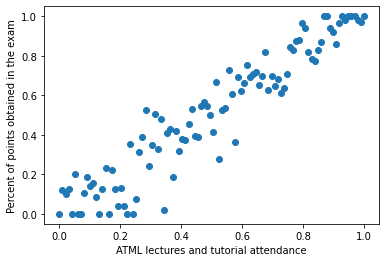

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('ATML lectures and tutorial attendance')
plt.ylabel('Percent of points obtained in the exam')

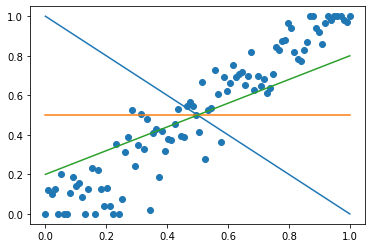

In [6]:
plt.scatter(x, y)
plt.plot(x, x * -1.0 + 1.)   # a = -1.0,    b = 1.
plt.plot(x, x * 0    + 0.5)  # a = 0,       b = 0.5
plt.plot(x, x * 0.6  + 0.2)  # a = 0.6,     b = 0.2

# PyTorch datasets
Some default implementations available: https://pytorch.org/docs/stable/data.html  
https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset  
For images: https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder  
**Dataset** must implement **\_\_getitem\_\_(index)** (returns indexed element) and **\_\_len\_\_()** (returns number of elements)  
We could use **TensorDataset** but let's write it

In [7]:
import torch
from torch.utils.data import Dataset
class NumpyDataset(Dataset):
    def __init__(self, data, target):
        # Store the data
        self.data = data
        self.target = target
        
    def __getitem__(self, index):
        # Anything could go here, e.g. image loading from file or a different structure
        # must return a data sample and its targetvalue/label (x and y in our case)
        # output type must be a tensor
        datapoint = self.data[index]
        target = self.target[index]
        return torch.tensor([datapoint]), torch.tensor([target]) # [] 1xN...
    
    def __len__(self):
        # must return number of examples
        return len(self.data)

In [8]:
# Create and test dataset
dataset = NumpyDataset(x, y)

In [9]:
dataset[50]

(tensor([0.5051]), tensor([0.4162]))

In [10]:
x[50], y[50]

(0.5050505, 0.41621757)

**DataLoader** objects provide a way to efficiently iterate over datasets https://pytorch.org/docs/stable/data.html

In [16]:
from torch.utils.data import DataLoader
# Create data loader for dataset in dataloader variable
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [17]:
#We can iterate over the dataset
for xs, ys in dataloader:
    print(xs.size(), ys.size()) # This is a so called mini batch of samples

torch.Size([100, 1]) torch.Size([100, 1])


## PyTorch modules
PyTorch modules are containers of parameters and define a function that transforms input data.  
**Module** objects need to have a **forward** method implemented that applies transformations (neural network layers) on data. https://pytorch.org/docs/stable/nn.html

In [18]:
import torch.nn as nn
class LinearTransformation(nn.Module):
    '''
    A linear layer implementation
    Linear layer parameters: - weight - M1xM2 matrix
                             - bias - M2 vector
    Takes an input data X of shape NxM1
    Outpus X*weight+bias of shape NxM2
    '''
    def __init__(self, input_dim, output_dim):
        super(LinearTransformation, self).__init__()
        # Tensors that we want to optimize must be wrapped as nn.Parameter
        # We initialize the parameters randomly
        self.weight = nn.Parameter(0.1*torch.randn(input_dim, output_dim)) # parameter "a"
        self.bias = nn.Parameter(torch.zeros(output_dim)) # parameter "b"
        
        
    def forward(self, x):
        # Implement linear transformation
        out = torch.matmul(x, self.weight)
        out = out + self.bias
        return out

In [19]:
# Initialize the model
model = LinearTransformation(1, 1)

In [20]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.0301]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True))

In [21]:
list(model.parameters()) # the parameters are listed here because we wrapped the weight and bias tensors as nn.Parameter

[Parameter containing:
 tensor([[-0.0301]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True)]

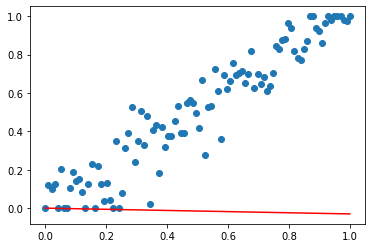

In [22]:
# Let's visualize current parameters
with torch.no_grad():
    x_data = np.linspace(0, 1, 100)
    x_data = torch.tensor(x_data, dtype=torch.float) #(100) -> (100x1)
    x_data = x_data.view(100, 1)
    predictions = model(x_data) # runs model.forward(x)
plt.scatter(x, y)
plt.plot(x_data, predictions.numpy(), color='red')

In [23]:
# Train the model
from utils import train_mse
train_mse(dataloader, model, n_epochs=500) ## will be covered in the next class

Epoch 1, loss: 0.38422757387161255
Epoch 2, loss: 0.24423450231552124
Epoch 3, loss: 0.16556194424629211
Epoch 4, loss: 0.12107056379318237
Epoch 5, loss: 0.09563987702131271
Epoch 6, loss: 0.08084551990032196
Epoch 7, loss: 0.07199355214834213
Epoch 8, loss: 0.0664684846997261
Epoch 9, loss: 0.06281273066997528
Epoch 10, loss: 0.06021377444267273
Epoch 11, loss: 0.0582185834646225
Epoch 12, loss: 0.05657433345913887
Epoch 13, loss: 0.055139798671007156
Epoch 14, loss: 0.053835902363061905
Epoch 15, loss: 0.05261824652552605
Epoch 16, loss: 0.05146171152591705
Epoch 17, loss: 0.05035197362303734
Epoch 18, loss: 0.04928069934248924
Epoch 19, loss: 0.048242922872304916
Epoch 20, loss: 0.04723555967211723
Epoch 21, loss: 0.04625657945871353
Epoch 22, loss: 0.04530452564358711
Epoch 23, loss: 0.04437831789255142
Epoch 24, loss: 0.043477047234773636
Epoch 25, loss: 0.04259994626045227
Epoch 26, loss: 0.04174628108739853
Epoch 27, loss: 0.04091540724039078
Epoch 28, loss: 0.04010670259594917

In [24]:
# Show A, b after training
model.weight, model.bias

(Parameter containing:
 tensor([[1.0458]], requires_grad=True),
 Parameter containing:
 tensor([-0.0135], requires_grad=True))

# Use the model for prediction

In [25]:
model.eval()
with torch.no_grad():
    x_data = np.linspace(0, 1, 100)
    x_data = torch.tensor(x_data, dtype=torch.float) #  size [100]
    x_data = x_data.view(-1, 1) # size [100, 1] (required)
    predictions = model(x_data)

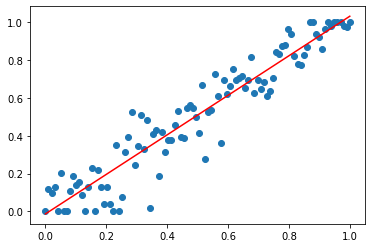

In [26]:
plt.scatter(x, y)
plt.plot(x_data, predictions.numpy(), color='red')

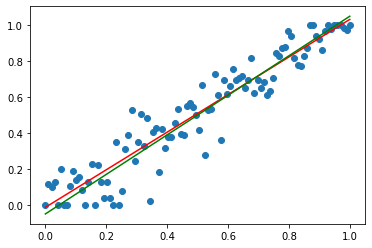

In [27]:
plt.scatter(x, y)
plt.plot(x_data, predictions.numpy(), color='red')
plt.plot(x, a*x + b, color='green') # a = 1.1, b = -0.5

# nn.Linear implementation
Linear layer is already implemented in PyTorch and we should be using this implementation  
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [28]:
class LinearModel(nn.Module):
    
    def __init__(self, input_dim):
        super(LinearModel, self).__init__()
        # initialize a Linear layer
        self.fc = nn.Linear(input_dim, 1) # a PyTorch module can contain other modules
                                          # this module has its own weight and bias parameters
        
    def forward(self, x):
        # apply linear transformation x * a + b and return the result
        out = self.fc(x)
        return out

In [29]:
# Create model
model = LinearModel(input_dim=1)

In [30]:
# Show randomly initialized a, b
model.fc.weight, model.fc.bias

(Parameter containing:
 tensor([[-0.1914]], requires_grad=True),
 Parameter containing:
 tensor([0.4289], requires_grad=True))

In [31]:
# Evaluate for randomly initialized model
# save results in `prediction` variable
model.eval()
with torch.no_grad():
    x_data = np.linspace(0, 1, 100)
    x_data = torch.tensor(x_data, dtype=torch.float) #(100) -> (100x1)
    x_data = x_data.view(-1, 1)
    predictions = model(x_data) # model.forward(x)

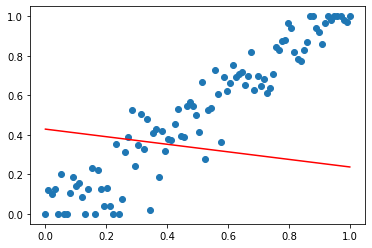

In [32]:
plt.scatter(x, y)
plt.plot(x_data, predictions.numpy(), color='red')

In [33]:
# Train the model
train_mse(dataloader, model, n_epochs=500) ## will be covered in the next class

Epoch 1, loss: 0.17194817960262299
Epoch 2, loss: 0.14768129587173462
Epoch 3, loss: 0.13290400803089142
Epoch 4, loss: 0.12344711273908615
Epoch 5, loss: 0.1169869601726532
Epoch 6, loss: 0.11222806572914124
Epoch 7, loss: 0.10844790190458298
Epoch 8, loss: 0.10524307936429977
Epoch 9, loss: 0.10238806903362274
Epoch 10, loss: 0.09975641220808029
Epoch 11, loss: 0.097276970744133
Epoch 12, loss: 0.09490928798913956
Epoch 13, loss: 0.09263017028570175
Epoch 14, loss: 0.09042594581842422
Epoch 15, loss: 0.08828835189342499
Epoch 16, loss: 0.08621212095022202
Epoch 17, loss: 0.0841936394572258
Epoch 18, loss: 0.08223032206296921
Epoch 19, loss: 0.08032004535198212
Epoch 20, loss: 0.07846109569072723
Epoch 21, loss: 0.07665188610553741
Epoch 22, loss: 0.07489102333784103
Epoch 23, loss: 0.07317714393138885
Epoch 24, loss: 0.07150895893573761
Epoch 25, loss: 0.06988523155450821
Epoch 26, loss: 0.06830477714538574
Epoch 27, loss: 0.06676643341779709
Epoch 28, loss: 0.06526908278465271
Epoch

In [34]:
# Show A, b after training
model.fc.weight, model.fc.bias

(Parameter containing:
 tensor([[1.0455]], requires_grad=True),
 Parameter containing:
 tensor([-0.0133], requires_grad=True))

In [35]:
model.eval()
with torch.no_grad():
    x_data = np.linspace(0, 1, 100)
    x_data = torch.tensor(x_data, dtype=torch.float) #  size [100]
    x_data = x_data.view(-1, 1) # size [100, 1] (required)
    predictions = model(x_data)

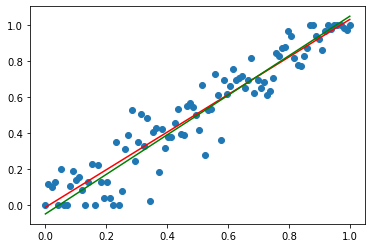

In [36]:
plt.scatter(x, y)
plt.plot(x, predictions.numpy(), color='red')
plt.plot(x, a*x + b, color='green') # a = 0.5, b = -0.8